In [5]:
import pynucastro as pyna

In [90]:
nuclei = ["h1", "he4", "b11", "c12", "n13", "n14",
          "o16", "ne20", "ne22", "na23",
          "mg24", "mg25", "mg26", "al27", "si28", "si29",
          "si30", "p30", "p31", "s32", "cl35",
          "ar36", "ar37", "ar38", "k39",
          "ca40", "sc43", "ti44", "v47", "cr48", "mn51",
          "fe52", "fe56", "co55", "ni56", "ni58", "ni59"]

In [91]:
len(nuclei)

37

In [92]:
rl = pyna.ReacLibLibrary()

In [93]:
lib1 = rl.linking_nuclei(nuclei)

In [94]:
len(lib1.get_rates())

125

In [95]:
lib1a = rl.linking_nuclei(["fe52", "fe56", "co55", "ni56", "ni58", "ni59", "n", "p", "he4"])

In [96]:
tl = pyna.TabularLibrary(ordering=["ffn", "langanke"])

In [97]:
lib2 = tl.linking_nuclei(nuclei + ["n"])

In [98]:
len(lib2.get_rates())

4

In [99]:
all_lib = lib1 + lib1a + lib2

In [100]:
dupes = all_lib.find_duplicate_links()
dupes

[[P30 ⟶ Si30 + e⁺ + 𝜈, P30 + e⁻ ⟶ Si30 + 𝜈], [n ⟶ p + e⁻ + 𝜈, n ⟶ p + e⁻ + 𝜈]]

In [101]:
rates_to_remove = []
for d in dupes:
    for r in d:
        if isinstance(r, pyna.rates.ReacLibRate):
            rates_to_remove.append(r)

for r in rates_to_remove:
    all_lib.remove_rate(r)

In [102]:
len(all_lib.get_rates())

132

In [103]:
net = pyna.AmrexAstroCxxNetwork(libraries=[all_lib])

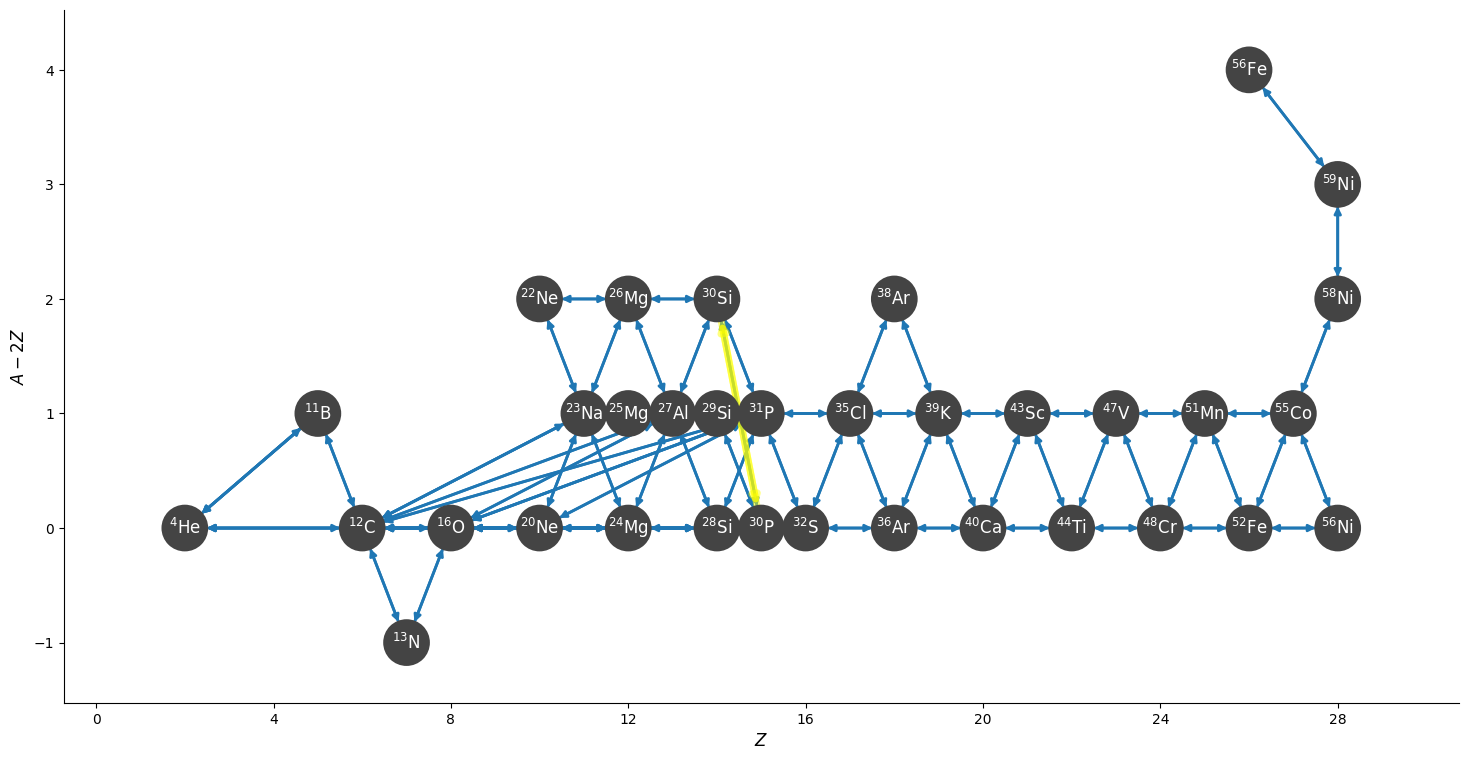

In [104]:
fig = net.plot(rotated=True, hide_xp=True, hide_xalpha=True,
               size=(1800, 900), highlight_filter_function=lambda r: isinstance(r, pyna.rates.TabularRate))

In [105]:
net.write_network()

In [106]:
for r in net.get_rates():
    if pyna.Nucleus("S31") in r.reactants + r.products:
        print(r)

In [107]:
len(net.unique_nuclei)

36